
Script prepared by Dr. Dasaraden Mauree                 
Contact: EPFL                                           
  dasaraden.mauree@epfl.ch / dasaraden.mauree@gmail.com  
                                                         
   use this script to read radiometer data from MoTUS,   
   calculate mean data and to create some plots.    


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
#importing necessary packages

import glob
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
import re


path =r'data' # use your path
#allFiles = glob.glob(path + "/*anem*")
j = pd.DataFrame()
hourlymean = pd.DataFrame()
df=pd.DataFrame()
eachday=pd.DataFrame()
result=pd.DataFrame()

#Declaring all variables 
pyrup =[]     #Pyranometer Upper Irradiance [W/m^2]
pyrdown=[]    #Pyranometer Lower Irradiance [W/m^2]
pygup=[]      #Pyrgeometer Upper Irradiance [W/m^2]
pygdown=[]    #Pyrgeometer Lower Irradiance [W/m^2]
a=[]          #Albedo [-] (Between [0;1] - Snow : 0.9 ; Grassland : 0.3.)
nsr=[]        #Net Solar radiation [W/m^2](Solar radiation that is absorbed by the earth surface. Always positive. 0 at night.)
ntr=[]        #Net (total) radiation [W/m^2]
nfr=[]        #Net Far Infrared radiation [W/m^2] (o   Often negative. Roughly independent of ambient temperature.)
skytemp=[]    #Sky temperature [°C](Clear conditions : sky temperature lower than ambient temperature & cloudy conditions : sky temperature is equal to ambient temperature.)
grdtemp=[]    #Ground temperature [°C] (Assumed to be roughly equal to ambiant temperature. May be lower than ambient temperature during the night and higher during the day.)
time=[]       #Timestamp

#Opening file and saving in array
allFiles = glob.glob(path + "/*radiometre.txt") 
    
for file in allFiles:
        
    fil=pd.read_csv(file, header=None, comment=',', error_bad_lines=False) #for20hz anem
    fileArray=np.array(fil)
              
    for k,line in enumerate(fileArray):
    
            #Reading time step
        timeStr=line[-1]
        contime=datetime.strptime(' '.join([timeStr]), '%d.%m.%Y %H:%M:%S')
          
            #storing in individual array
        time.append(contime)
        pyrup.append(float(line[0]))
        pyrdown.append(float(line[1]))
        pygup.append(float(line[2]))
        pygdown.append(float(line[3]))
        a.append(float(line[4]))
        nsr.append(float(line[5]))
        ntr.append(float(line[6]))
        nfr.append(float(line[7]))
        skytemp.append(float(line[8]))
        grdtemp.append(float(line[9]))

            
    j['datetime']=pd.to_datetime(time)
    j=j.set_index('datetime')
    j['Pyranometer Upper Irradiance [W/m$^2$]']=pyrup
    j['Pyranometer Lower Irradiance [W/m$^2$]']=pyrdown
    j['Pyrgeometer Upper Irradiance [W/m$^2$]']=pygup
    j['Pyrgeometer Lower Irradiance [W/m$^2$]']=pygdown
    j['Albedo [-]']=a
    j['Net Solar radiation [W/m$^2$]']=nsr
    j['Net (total) radiation [W/m$^2$]']=ntr
    j['Net Far Infrared radiation [W/m$^2$]']=nfr
    j['Sky temperature [°C]']=skytemp
    j['Radiometer Ground temperature [°C]']=grdtemp
          
    hourlymean=j.resample('30min').mean()
    hourlymean=hourlymean[:-1]        
    hourlymean=hourlymean.round(1)

    pyrup, pyrdown, pygup,pygdown,a,nsr,ntr,nfr,skytemp,grdtemp,time=[],[],[],[],[],[],[],[],[],[],[]
    j = pd.DataFrame()
    eachday=eachday.append(hourlymean)
                   
result = eachday.sort_index(axis=0, ascending=True)
eachday.to_csv('radiometer.csv', header=True, index=True, sep=' ', mode='a')
hourlymean=pd.DataFrame()
result=pd.DataFrame()

In [24]:
j

,Pyranometer Upper Irradiance [W/m$^2$],Pyranometer Lower Irradiance [W/m$^2$],Pyrgeometer Upper Irradiance [W/m$^2$],Pyrgeometer Lower Irradiance [W/m$^2$],Albedo [-],Net Solar radiation [W/m$^2$],Net (total) radiation [W/m$^2$],Net Far Infrared radiation [W/m$^2$],Sky temperature [°C],Ground temperature [°C]
datetime,,,,,,,,,,
2017-07-18 00:00:00,-4.1,-1.8,367.0,432.7,NaN,-2.4,-68.1,-65.8,10.5,22.4
2017-07-18 00:30:00,-3.3,-1.7,366.6,430.0,NaN,-1.6,-65.1,-63.5,10.4,22.0
2017-07-18 01:00:00,-3.2,-1.8,364.9,427.5,NaN,-1.4,-64.1,-62.7,10.1,21.5
2017-07-18 01:30:00,-3.2,-2.4,363.3,424.9,NaN,-0.7,-62.3,-61.6,9.8,21.1
2017-07-18 02:00:00,-3.0,-1.2,361.9,422.9,NaN,-1.8,-62.8,-61.0,9.5,20.7
2017-07-18 02:30:00,-2.5,-1.5,359.6,420.8,NaN,-1.0,-62.2,-61.2,9.1,20.4
2017-07-18 03:00:00,-3.3,-1.4,357.5,417.5,NaN,-1.9,-61.9,-60.0,8.6,19.8
2017-07-18 03:30:00,-2.3,-1.3,357.9,416.6,NaN,-1.0,-59.7,-58.7,8.7,19.6
2017-07-18 04:00:00,-2.0,-0.8,357.6,414.7,NaN,-1.2,-58.3,-57.1,8.6,19.3


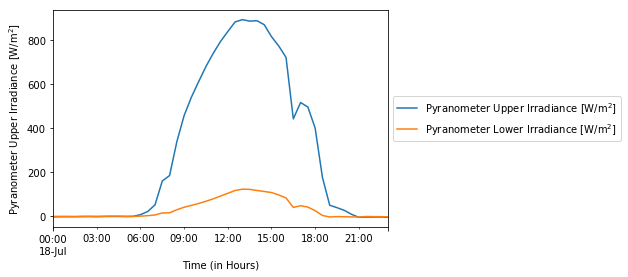

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline 
eachday[['Pyranometer Upper Irradiance [W/m$^2$]','Pyranometer Lower Irradiance [W/m$^2$]']].plot()
#plt.figtext(0.15,0.85,'(a)')
plt.ylabel('Pyranometer Upper Irradiance [W/m$^2$]')
plt.xlabel('Time (in Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.savefig('pyranometer.png', bbox_inches='tight',dpi=1200)

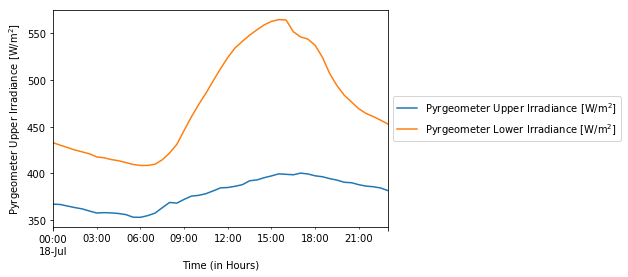

In [15]:
eachday[['Pyrgeometer Upper Irradiance [W/m$^2$]','Pyrgeometer Lower Irradiance [W/m$^2$]']].plot()
#plt.figtext(0.15,0.85,'(b)')
plt.ylabel('Pyrgeometer Upper Irradiance [W/m$^2$]')
plt.xlabel('Time (in Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.savefig('pyrgeometer.png', bbox_inches='tight',dpi=1200)

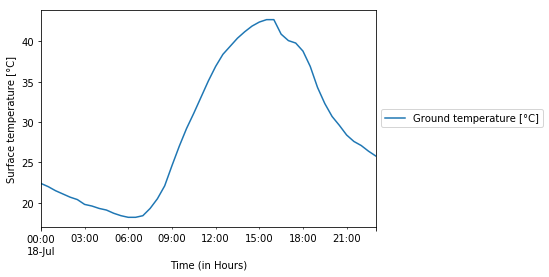

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline 
eachday[['Ground temperature [°C]']].plot()
#plt.figtext(0.15,0.85,'(a)')
plt.ylabel('Surface temperature [°C]')
plt.xlabel('Time (in Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.savefig('surftemp_radiometer.png', bbox_inches='tight',dpi=1200)

In [38]:
###########################################################
# Script prepared by Dr. Dasaraden Mauree                 #
#  Contact: EPFL                                          # 
#  dasaraden.mauree@epfl.ch / dasaraden.mauree@gmail.com  #
#                                                         #
#   use this script to read anemometer data from MoTUS,   #
#   calculate hourly mean data and to sort out data in    #
#   ascending order.                                      #
###########################################################

#importing necessary packages

import glob
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
import re


path =r'data' # use your path
#allFiles = glob.glob(path + "/*anem*")
k = pd.DataFrame()
hourlymean = pd.DataFrame()
eachdaysurf=pd.DataFrame()

#Declaring all variables 
grdtemp=[]      #Ground temperature [°C] (Assumed to be roughly equal to ambiant temperature. May be lower than ambient temperature during the night and higher during the day.)
northtemp=[]    #Façade facing North [°C]
easttemp=[]     #Façade facing East [°C]
southtemp=[]    #Façade facing South [°C]
westtemp=[]     #Façade facing West [°C]
time=[]         #Timestamp

#Opening file and saving in array
allFiles = glob.glob(path + "/*TempAll.txt") 
    
for file in allFiles:
        
    fil=pd.read_csv(file, header=None, comment=',', error_bad_lines=False) #for20hz anem
    fileArray=np.array(fil)
              
    for i,line in enumerate(fileArray):
    
            #Reading time step
        timeStr=line[-1]
        contime=datetime.strptime(' '.join([timeStr]), '%d.%m.%Y %H:%M:%S')
          
            #storing in individual array
        time.append(contime)
        grdtemp.append(float(line[0]))
        northtemp.append(float(line[1]))
        easttemp.append(float(line[2]))
        southtemp.append(float(line[3]))
        westtemp.append(float(line[4]))
            
    k['datetime']=pd.to_datetime(time)
    k=k.set_index('datetime')
    k['Sensor Ground temperature [°C]']=grdtemp
    k['North temperature [°C]']=northtemp
    k['East temperature [°C]']=easttemp
    k['South temperature [°C]']=southtemp
    k['West temperature [°C]']=westtemp

    hourlymean=k.resample('30min').mean()
    hourlymean=hourlymean[:-1]        
    hourlymean=hourlymean.round(1)

    grdtemp,northtemp,easttemp,southtemp,westtemp,time=[],[],[],[],[],[]
    k = pd.DataFrame()
    eachdaysurf=eachdaysurf.append(hourlymean)

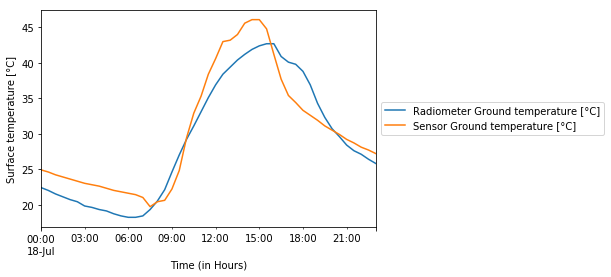

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline 
#y1=eachday['Radiometer Ground temperature [°C]']
#y2=eachdaysurf['Sensor Ground temperature [°C]']
#plt.plot(y1)
ax = eachday['Radiometer Ground temperature [°C]'].plot()
eachdaysurf['Sensor Ground temperature [°C]'].plot(ax=ax)
#plt.plot(y2)
#plt.figtext(0.15,0.85,'(a)')
plt.ylabel('Surface temperature [°C]')
plt.xlabel('Time (in Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.savefig('surftemp_radiometer.png', bbox_inches='tight',dpi=1200)

In [43]:
y1

datetime
2017-07-18 00:00:00    22.4
2017-07-18 00:30:00    22.0
2017-07-18 01:00:00    21.5
2017-07-18 01:30:00    21.1
2017-07-18 02:00:00    20.7
2017-07-18 02:30:00    20.4
2017-07-18 03:00:00    19.8
2017-07-18 03:30:00    19.6
2017-07-18 04:00:00    19.3
2017-07-18 04:30:00    19.1
2017-07-18 05:00:00    18.7
2017-07-18 05:30:00    18.4
2017-07-18 06:00:00    18.2
2017-07-18 06:30:00    18.2
2017-07-18 07:00:00    18.4
2017-07-18 07:30:00    19.3
2017-07-18 08:00:00    20.5
2017-07-18 08:30:00    22.1
2017-07-18 09:00:00    24.6
2017-07-18 09:30:00    27.0
2017-07-18 10:00:00    29.2
2017-07-18 10:30:00    31.1
2017-07-18 11:00:00    33.1
2017-07-18 11:30:00    35.1
2017-07-18 12:00:00    36.9
2017-07-18 12:30:00    38.4
2017-07-18 13:00:00    39.4
2017-07-18 13:30:00    40.4
2017-07-18 14:00:00    41.2
2017-07-18 14:30:00    41.9
2017-07-18 15:00:00    42.4
2017-07-18 15:30:00    42.7
2017-07-18 16:00:00    42.7
2017-07-18 16:30:00    40.9
2017-07-18 17:00:00    40.1
2017-07-18 